In [1]:
import cv2
import time
import tomopy 
import matplotlib.pyplot as plt
import numpy as np
import dxchange as dx
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from array import *
rec = dict()

(1, 128, 128)


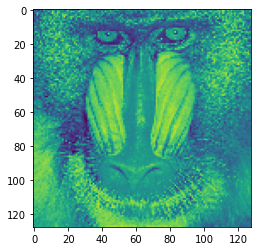

In [2]:
obj = tomopy.baboon(size=128)
print(obj.shape)
plt.figure()
plt.imshow(obj[0])
plt.show()

In [3]:
ang = tomopy.angles(nang=120, ang1=0, ang2=180)


In [4]:
prj = tomopy.project(obj, ang, pad=True)

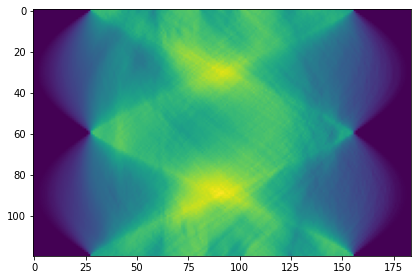

In [5]:
plt.figure(tight_layout=True)
plt.imshow(prj[:, 0, :])
plt.show()

In [6]:
prj_poisson = tomopy.add_poisson(prj/10)*100



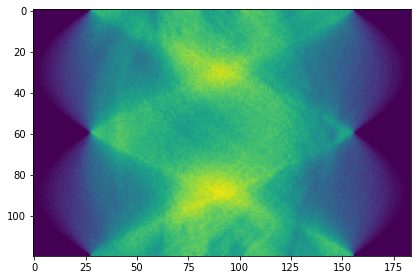

In [7]:
plt.figure(tight_layout=True)
plt.imshow(prj_poisson[:, 0, :])
plt.show()

In [8]:
def add_rings(tomo, std=0.005):
    new_tomo = np.copy(tomo)
    sensitivity = np.random.normal(loc=1, scale=std, size=(1, new_tomo.shape[1], new_tomo.shape[2]))
    new_tomo = new_tomo * sensitivity
    return new_tomo


In [9]:
prj_screwed_up = add_rings(prj_poisson)

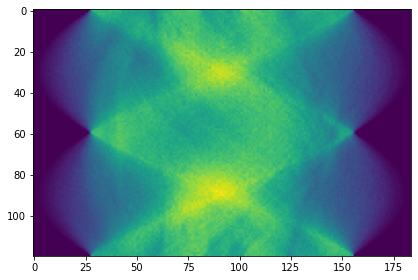

In [10]:
plt.figure(tight_layout=True)
plt.imshow(prj_screwed_up[:, 0, :])
plt.show()

In [11]:
def ten_dis (algorithm):
    arrays = dict();
    array_n = []
    array_t = []
    if algorithm != 'ospml_hybrid2':
        for x in range(0,15):
            tic = time.perf_counter()
            array_n.append(tomopy.recon(prj_screwed_up, ang, num_gridx=128, algorithm = algorithm, num_gridy=128, num_iter= 2*x+2))
            toc = time.perf_counter()
            array_t.append(toc-tic)
    else:
        for x in range(0,15):
            tic = time.perf_counter()
            array_n.append(tomopy.recon(prj_screwed_up, ang, algorithm = 'ospml_hybrid', num_gridx = 128, num_gridy=128, num_iter=2*x+2, reg_par = [.1, .1], num_block=10))
            toc = time.perf_counter()
            array_t.append(toc-tic)
    arrays['time'] = array_t
    arrays['iterations'] = array_n
    return arrays

In [12]:
rec['art'] = ten_dis('art')
rec['mlem']= ten_dis('mlem')
rec['ospml_hybrid'] = ten_dis('ospml_hybrid')

Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstruc

(1, 128, 128)


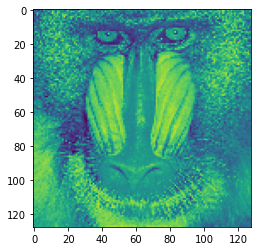

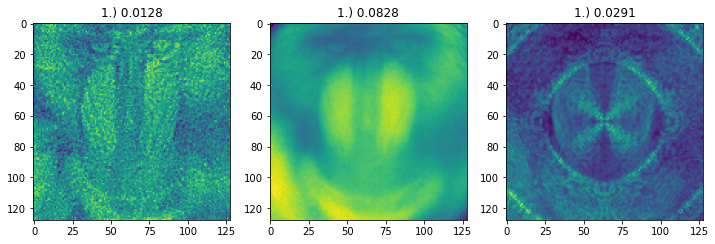

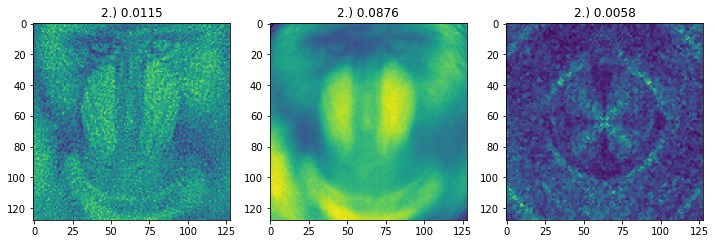

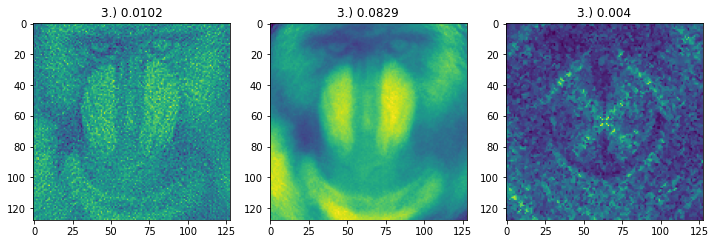

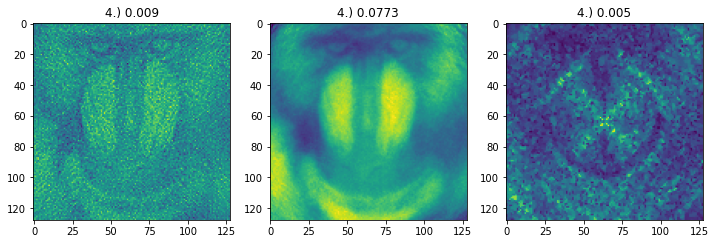

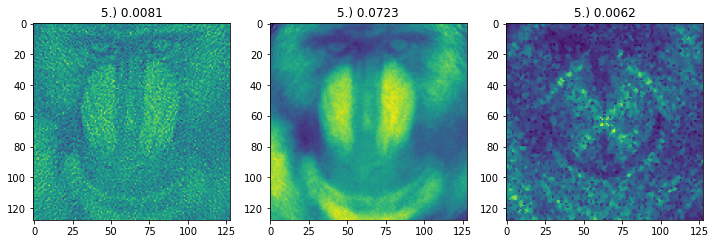

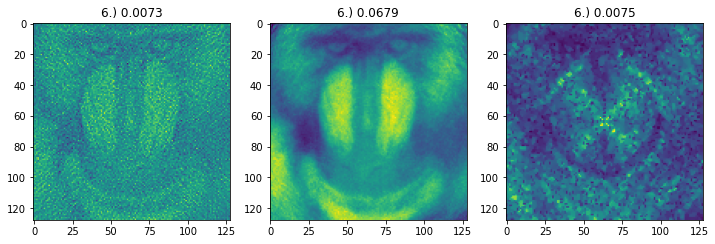

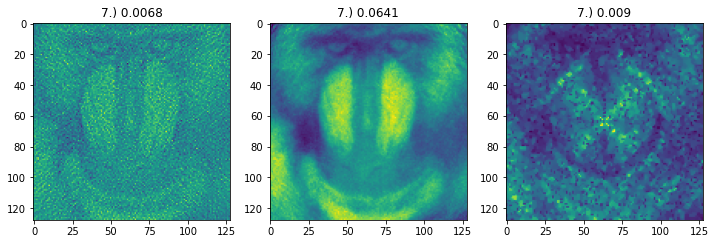

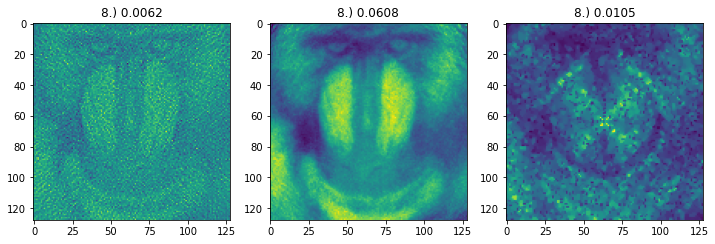

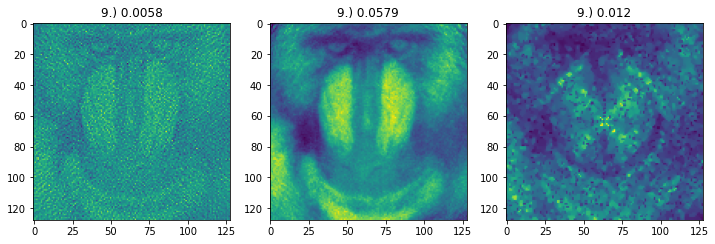

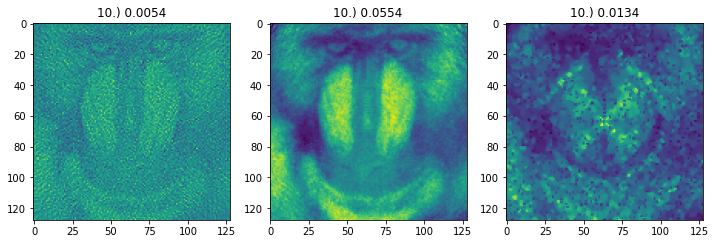

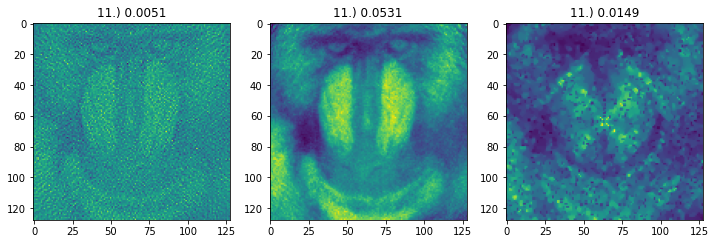

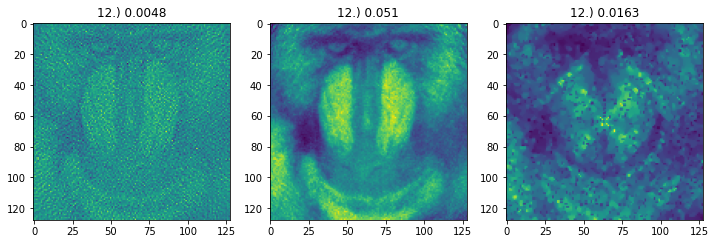

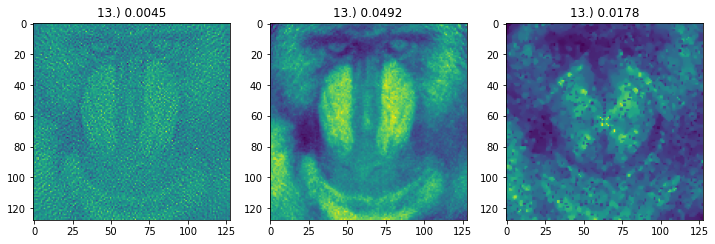

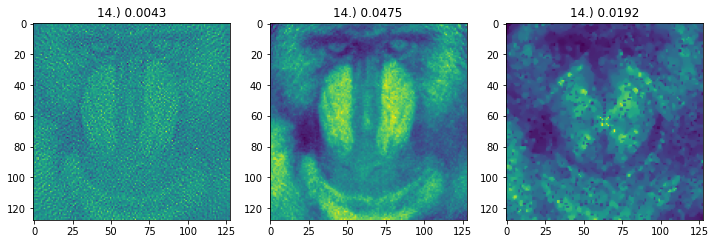

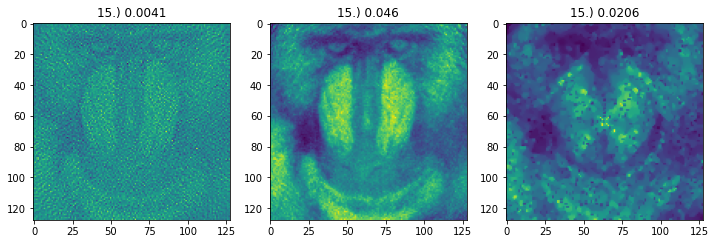

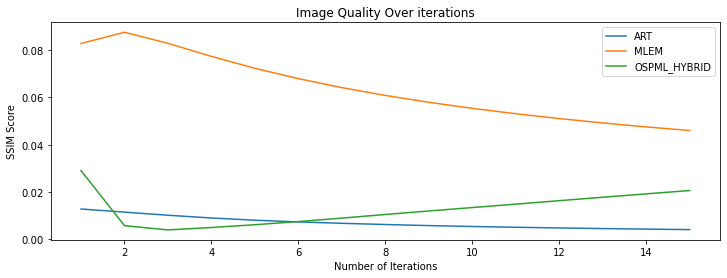

In [16]:
art_array = []
mlem_array = []
ospml_hybrid_array = []
print(obj.shape)
plt.figure()
plt.imshow(obj[0])
plt.show()
for x in range(0,45):
    if x%3==0:
        plt.figure(figsize=(12,4))
        plt.subplot(131+x%3)
        plt.imshow(rec['art']['iterations'][int(x/3)][0])
        str1 = str(round(int(x/3)+1,4))
        str1 += '.) '
        str1 += str(round(ssim(obj[0], rec['art']['iterations'][int(x/3)][0]),4))
        plt.title(str1)
        art_array.append(ssim(obj[0], rec['art']['iterations'][int(x/3)][0]))


    if x%3==1:
        plt.subplot(131+x%3)
        plt.imshow(rec['mlem']['iterations'][int(((x-x%3)/3))][0])
        str1 = str(round(int(((x-x%3)/3)+1),4))
        str1+= '.) '
        str1 += str(round(ssim(obj[0], rec['mlem']['iterations'][int(((x-x%3)/3))][0]),4))
        plt.title(str1)
        mlem_array.append(ssim(obj[0], rec['mlem']['iterations'][int(((x-x%3)/3))][0]))


    if x%3==2:
        plt.subplot(131+x%3)
        plt.imshow(rec['ospml_hybrid']['iterations'][int(((x-x%3)/3))][0])
        str1 = str(round(int((x-x%3)/3)+1,4))
        str1 += '.) '
        str1 += str(round(ssim(obj[0], rec['ospml_hybrid']['iterations'][int(((x-x%3)/3))][0]),4))
        plt.title(str1)
        ospml_hybrid_array.append(ssim(obj[0], rec['ospml_hybrid']['iterations'][int(((x-x%3)/3))][0]))

        
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  
plt.figure(figsize=(12,4))
plt.xlabel('Number of Iterations')
plt.ylabel('SSIM Score')
plt.title('Image Quality Over iterations')
plt.plot(X, art_array, label= 'ART')
plt.plot(X, mlem_array, label= 'MLEM')
plt.plot(X, ospml_hybrid_array, label= 'OSPML_HYBRID')
plt.legend()
plt.show()

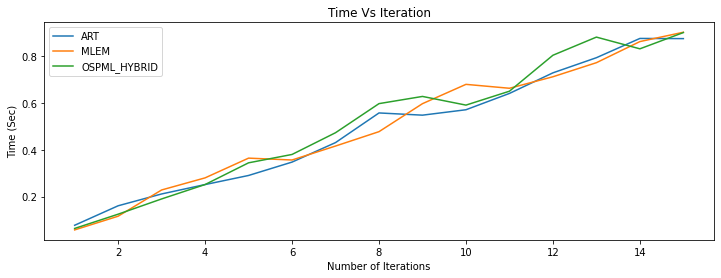

In [17]:
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  
plt.figure(figsize=(12,4))
plt.xlabel('Number of Iterations')
plt.ylabel('Time (Sec)')
plt.title('Time Vs Iteration')
plt.plot(X, rec['art']['time'], label= 'ART')
plt.plot(X, rec['mlem']['time'], label = 'MLEM' )
plt.plot(X, rec['ospml_hybrid']['time'], label = 'OSPML_HYBRID')
plt.legend()
plt.show()